# Predicting Sales for Favorita Supermarket

In this project, I use time-series forecasting to forecast store sales for Corporación Favorita, a large Ecuadorian-based grocery retailer.

Forecasts are especially relevant to brick-and-mortar grocery stores, which must dance delicately with how much inventory to buy. Predict a little over, and grocers are stuck with overstocked, perishable goods. Guess a little under, and popular items quickly sell out, leading to lost revenue and upset customers. More accurate forecasting, thanks to machine learning, could help ensure retailers please customers by having just enough of the right products at the right time.

Current subjective forecasting methods for retail have little data to back them up and are unlikely to be automated. The problem becomes even more complex as retailers add new locations with unique needs, new products, ever-transitioning seasonal tastes, and unpredictable product marketing.

## 1. Data 

There are 5 data tables provided by the company
<br>
1) Train: The training dataset consists of 3000888 data points for 54 stores from 2013-01-01 to 2017-08-15
<br>
2) Test: The test dataset looks similar to the training dataset and contains data in the next 15 days following the training set
<br>
3) Oil: Contains oil price data from 2013 to 2017. Ecuador is an oil-dependent economy.
<br>
4) Stores: Tells us the location of a store
<br>
5) Holidays Events: Tells us whether a particular date is a national, regional, or local holiday. 

I added data from external sources which I believe have strong correlation with the stores' daily sales:
<br>
1) Oil prices and Exxon stock prices from Yahoo Finance - These will help with missing oil price data in the dataset provided by the company
<br>
2) CPI, Population, GDP per CAPITA from world bank 

I then created 2 datasets: one for nationwide aggregated daily sales and one for daily sales at store level 

[Google Colab - Data Cleaning](https://colab.research.google.com/drive/1b-MgQHnU4bJG1scwBxubLt3B1Ca9Yk72#scrollTo=lCqUgX6g_pxS) 

[Data File - Nationwide daily sales](https://drive.google.com/drive/u/0/folders/1pUolHpeB9aaehKY1ZSZDQ78ws6m_DpJR)

[Data File - Daily sales by store](https://drive.google.com/drive/u/0/folders/1pUolHpeB9aaehKY1ZSZDQ78ws6m_DpJR)

## 2. EDA

[Google Colab - EDA](https://colab.research.google.com/drive/12Sr-JmsNdWy2CJsxZeYP0lNE__i5sXl7#scrollTo=RrbzXNzciGaS)

**Seasonality**: Sales data shows weekly and monthly seasonality. Sales rise toward the weekend within a week, and toward December within a year. I also examined the seasonality against salary days and national, regional, and local holidays but there was no material difference among those groups.

Figure: Weekly trend

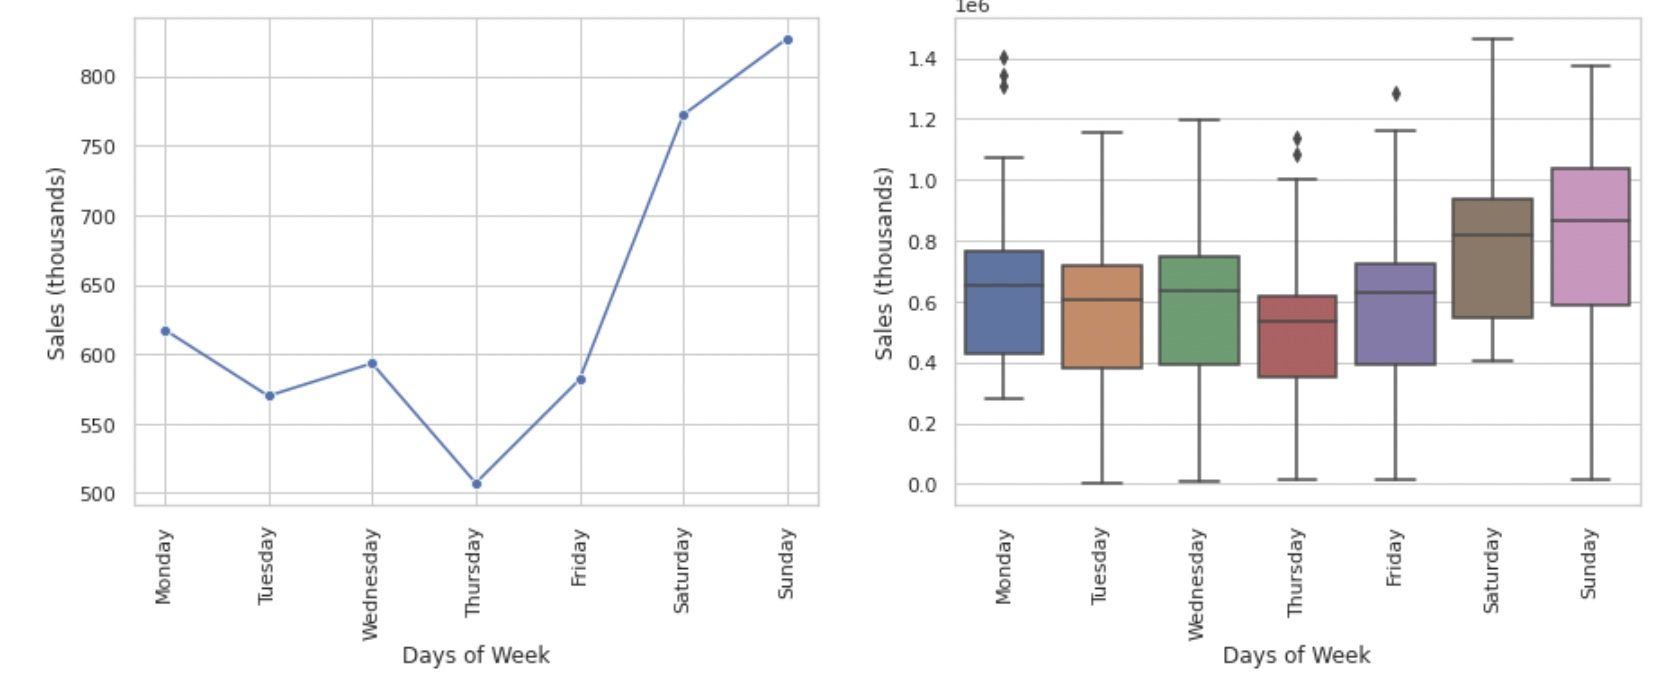

Figure: Monthly trend

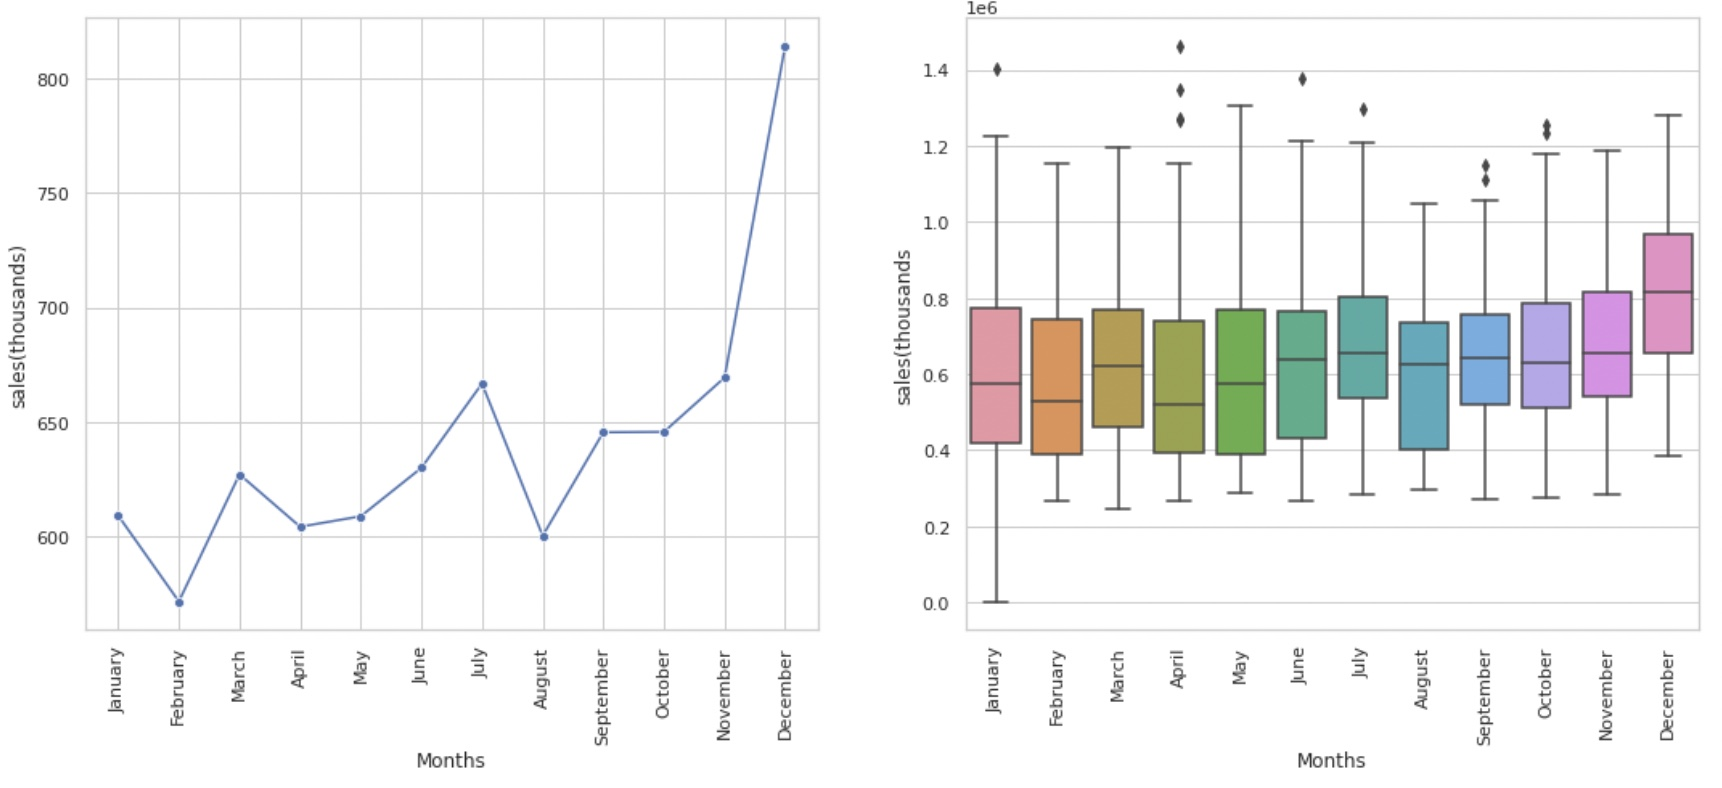

**Macro-economics**: Supermarket sales are strongly correlated with the population in the vicinity,but negatively correlated with the inflation index (CPI) and the global crude oil prices. This is understandable as Ecuador is an oil-dependent economy. If the oil prices go up, inflation will also rise and people’s purchasing power will weaken

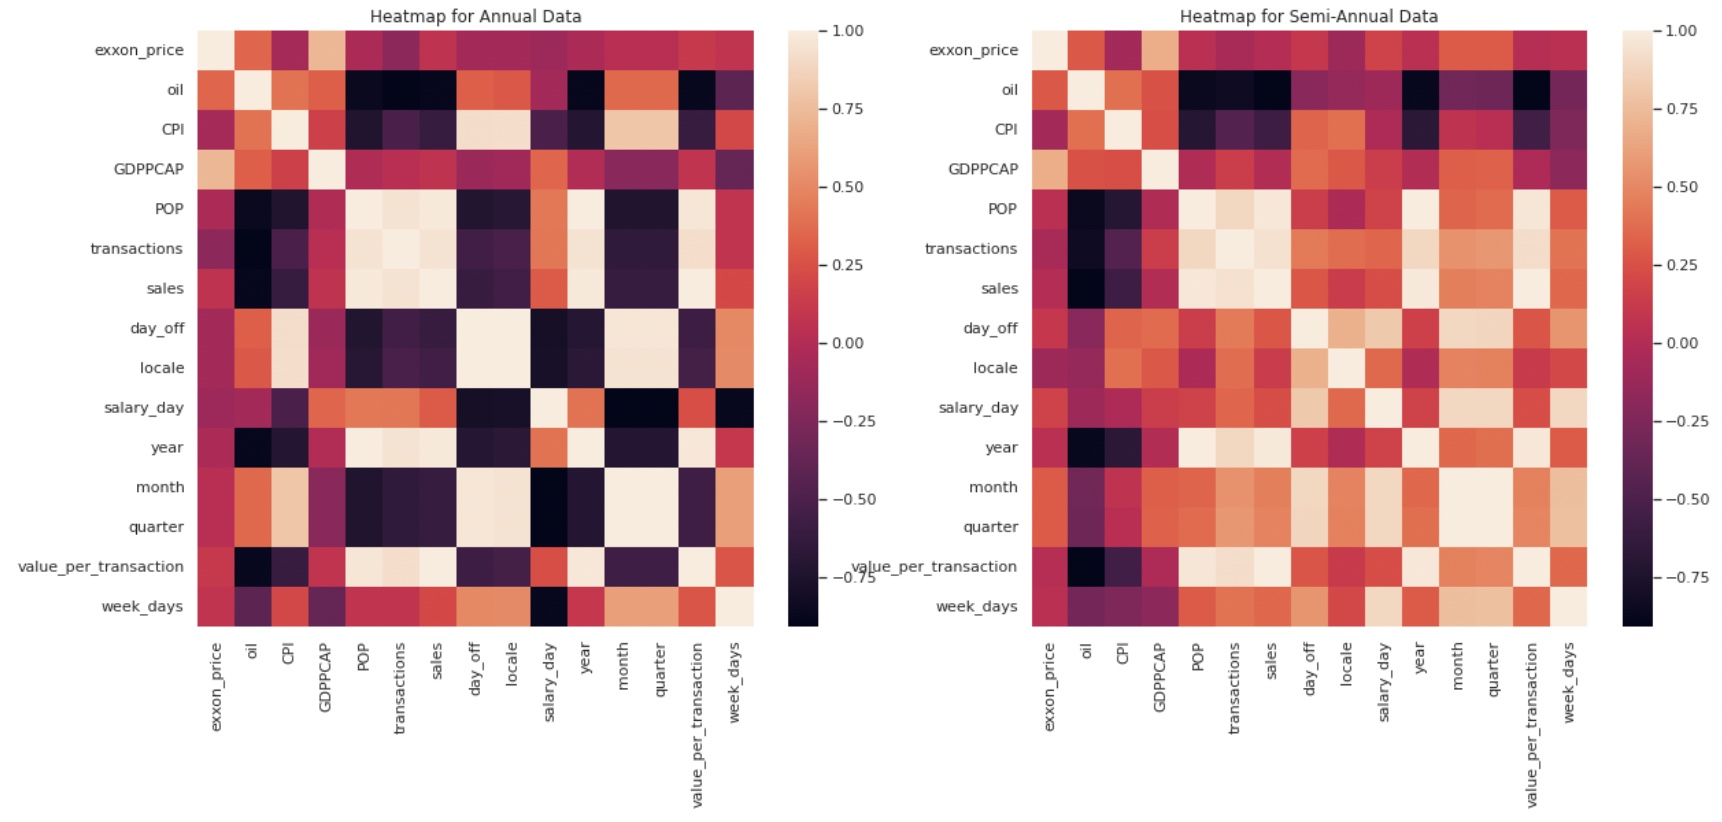

**Historical sales**: There is a spike in the first lag of PACF, signalling that yesterday sales have strong influences on the current day figures. Customers’ shopping habits tend to be stable over a small time frame so the recent days’ sales are some of the best predictors for tomorrow’s sales.     

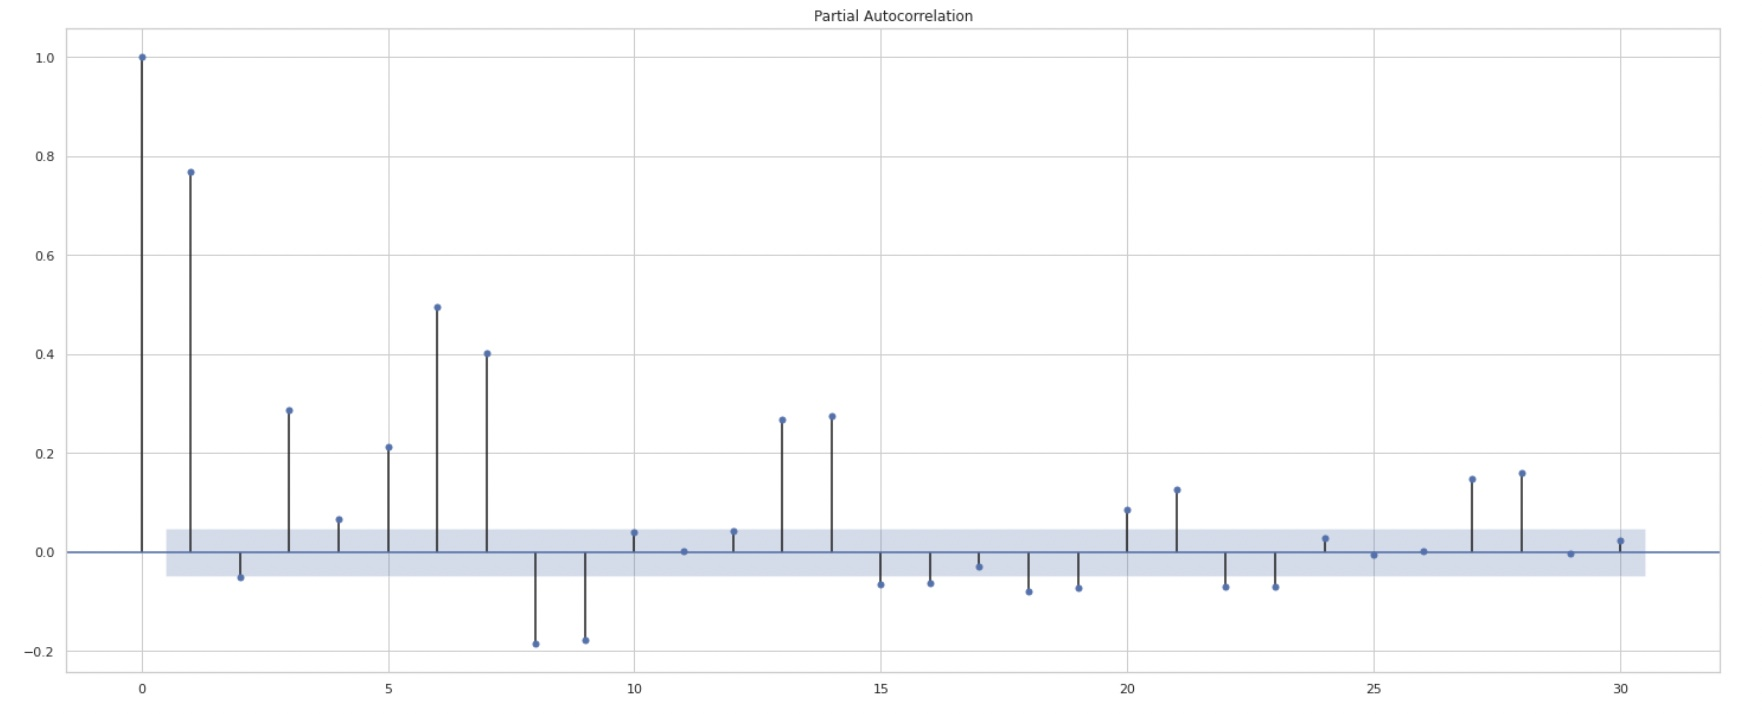

## 3. Modelling 

[Google Colab - Modelling](https://colab.research.google.com/drive/1vsbMI9QyX2Tk0tfIkUnTcGEYF228uOtM#scrollTo=BMjQQ59_8G8U)

Big supermarket chain restock daily so we focus on daily sales forecast, as opposed to weekly or monthly. I will first explore nationwide daily sales forecast, then go down to store level. I limit the scope to the top 14 stores that contribute 50% revenue. I will be using 2 main methods:
<br>
1) Univariate Time Series Forecasting (ARIMA, SARIMA, AR, MA, etc.): These methods are capable of only looking at the target variable. This means no other regressors (more variables) can be added into the model.
<br>
2) Multivariate Time Series Forecasting: Linear, Tree, XGBoost
<br>
I evaluate these models using MAPE (mean average percentage error)

XGBoost performs the best with MAPE = 0.17. This is the only model that picks up the seasonality dip on the first day of a year. 

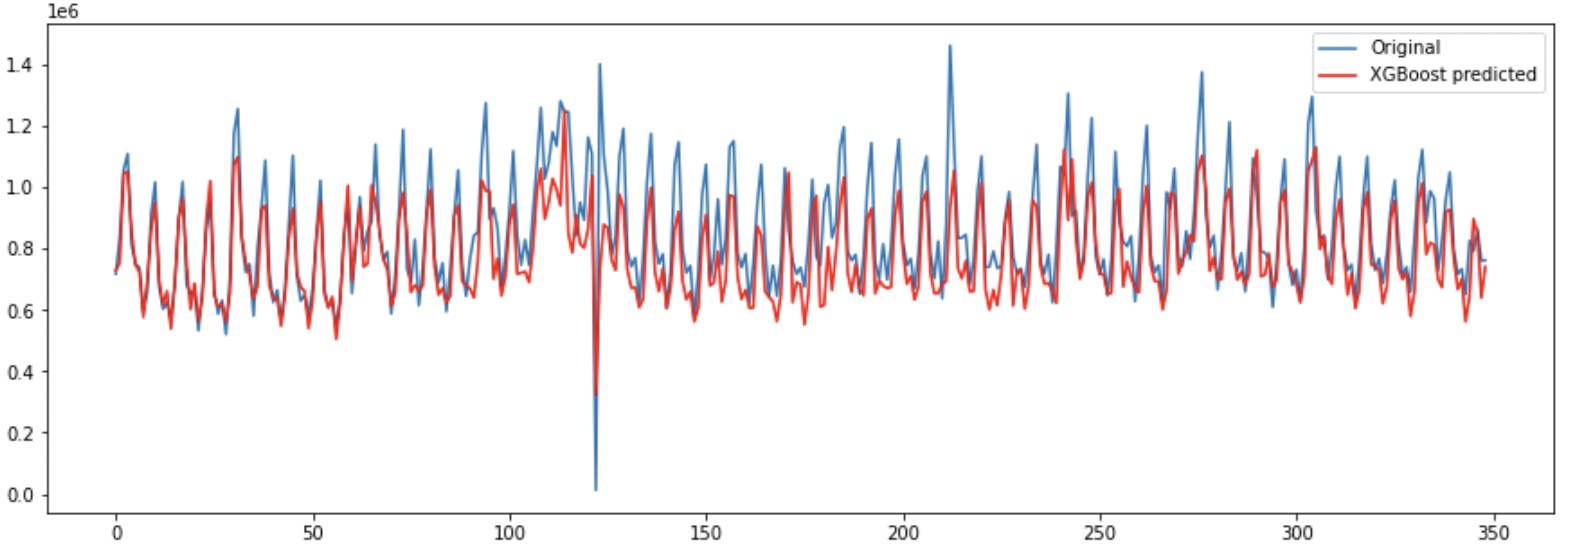

## 4. Next Steps

<li>Develop a predictive model for each popular product item by store. This requires more granular data than what we currently have</li>
<li>Build a webapp that shows a store manager his/her store's historical performance and the next few weeks' outlook</li>

Figure: Streamlit webapp UI

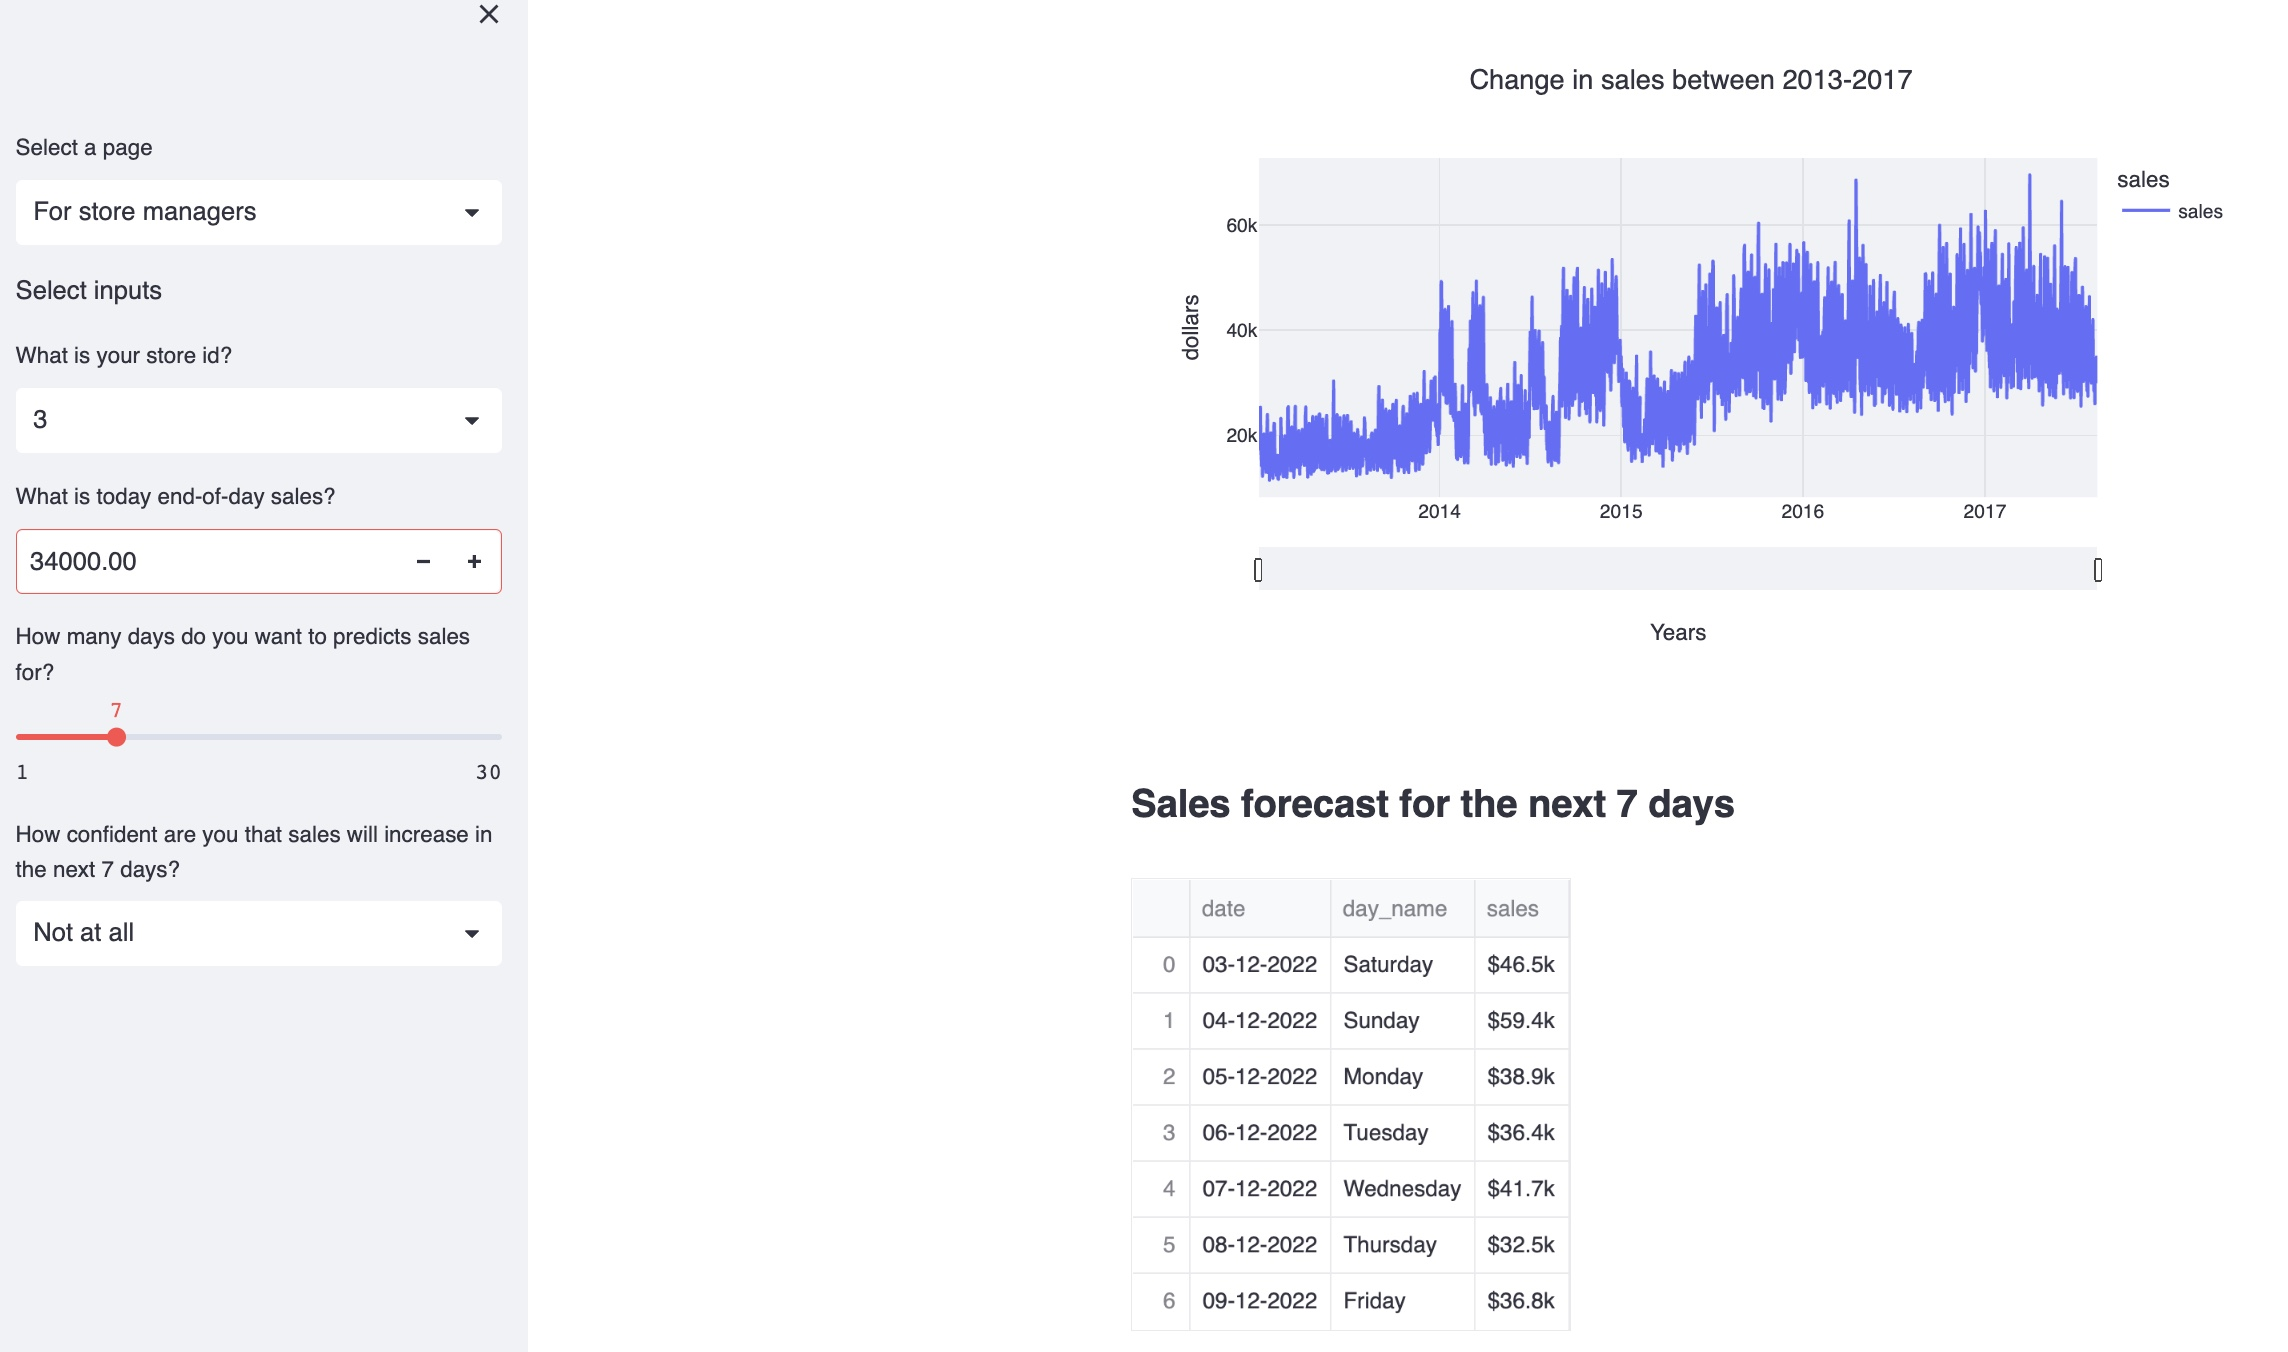